In [3]:
from tensorflow import keras
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [4]:
import numpy as np
 
def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results
 
# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)
# Vectorize labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [9]:
from keras import models
from keras import layers
 
network = models.Sequential()
network.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
network.add(layers.Dense(16, activation='relu'))
network.add(layers.Dense(1, activation='sigmoid'))

network.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])

In [19]:
x_validation = x_train[15000:]
y_validation = y_train[15000:]

x_training = x_train[:15000]
y_training = y_train[:15000]

history = network.fit(x=x_training, y=y_training, batch_size=512, epochs=20, validation_data=(x_validation, y_validation))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 1s 89us/step - loss: 0.0045 - accuracy: 0.9997 - val_loss: 0.7270 - val_accuracy: 0.8624
Epoch 2/20
15000/15000 [==============================] - 1s 88us/step - loss: 0.0066 - accuracy: 0.9989 - val_loss: 0.7581 - val_accuracy: 0.8625
Epoch 3/20
15000/15000 [==============================] - 1s 89us/step - loss: 0.0031 - accuracy: 0.9997 - val_loss: 0.7870 - val_accuracy: 0.8614
Epoch 4/20
15000/15000 [==============================] - 1s 89us/step - loss: 0.0064 - accuracy: 0.9981 - val_loss: 0.8271 - val_accuracy: 0.8595
Epoch 5/20
15000/15000 [==============================] - 1s 93us/step - loss: 0.0019 - accuracy: 0.9998 - val_loss: 0.8454 - val_accuracy: 0.8589
Epoch 6/20
15000/15000 [==============================] - 1s 93us/step - loss: 0.0016 - accuracy: 0.9998 - val_loss: 0.8915 - val_accuracy: 0.8573
Epoch 7/20
15000/15000 [==============================] - 1s 89us/st

In [20]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-white')

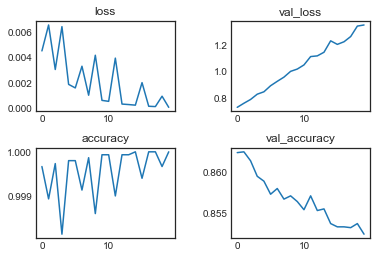

In [36]:
history_dict['loss']

fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)

plt.subplot(2, 2, 1)
plt.title('loss')
plt.plot(history_dict['loss'])
plt.subplot(2, 2, 2)
plt.title('val_loss')
plt.plot(history_dict['val_loss'])
plt.subplot(2, 2, 3)
plt.title('accuracy')
plt.plot(history_dict['accuracy'])
plt.subplot(2, 2, 4)
plt.title('val_accuracy')
plt.plot(history_dict['val_accuracy'])

plt.show()

In [38]:
test_loss, test_acc = network.evaluate(x_test, y_test)
 
print('test_loss: ', test_loss, '\ntest_acc: ', test_acc)

25000/25000 [==============================] - 1s 29us/step
test_loss:  1.4810553660535812 
test_acc:  0.8364800214767456
